# Agrupación de categoría a través de Word2Vec y K-Means


In [151]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import gensim
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
import nltk as nlp
import matplotlib.pyplot as plt
import matplotlib
from deep_translator import GoogleTranslator
from sklearn.cluster import KMeans

In [152]:
df= pd.read_csv("C:/Users/Alex/OneDrive/Desktop/python_proyects/swoopo_proyect/primera_categorizacion.csv")
df.head()

,Unnamed: 0,item,categoria
0,0,sony-ericsson-s500i-unlocked-mysterious-,Móviles
1,1,psp-slim-lite-sony-piano-black,Juegos para Sony PSP
2,2,ipod-touch-apple-8gb-with-software-upgra,Reproductores de MP3 y MP4 portátiles
3,3,lg-ku990-viewty-unlocked-black,Informática
4,4,logitech-cordless-wave-keyboard-and-mous,"Teclados, ratones y periféricos de entrada"


In [153]:
df=df.loc[:,["item","categoria"]]

 Traducimos la categoría al inglés.

In [154]:
dict={}
for traducir in df.categoria.unique():
    dict[traducir]= GoogleTranslator(source='spanish', target='english').translate(traducir)

df_2=pd.DataFrame({"categoria":dict.keys(),"categoria_ingles":dict.values()})
df=df.merge(df_2,on="categoria",how="left")
df.to_csv("C:/Users/Alex/OneDrive/Desktop/python_proyects/swoopo_proyect/primera_categorizacion+ingles.csv")
df.head()

,item,categoria,categoria_ingles
0,sony-ericsson-s500i-unlocked-mysterious-,Móviles,Mobile
1,psp-slim-lite-sony-piano-black,Juegos para Sony PSP,Games for Sony PSP
2,ipod-touch-apple-8gb-with-software-upgra,Reproductores de MP3 y MP4 portátiles,Portable MP3 and MP4 players
3,lg-ku990-viewty-unlocked-black,Informática,Computing
4,logitech-cordless-wave-keyboard-and-mous,"Teclados, ratones y periféricos de entrada","Keyboards, mice and input peripherals"


Nos quedamos sólo con las palabras importantes y con la raiz de estas palabras

In [155]:
dict_2={}
for categoria in df.categoria_ingles.unique():
    categoria_new=categoria.lower()
    categoria_new=nltk.word_tokenize(categoria_new)
    categoria_new=[word for word in categoria_new if not word in set(stopwords.words("english"))]
    lem = nlp.WordNetLemmatizer()
    categoria_new= [lem.lemmatize(word) for word in categoria_new]
    categoria_new=[word for word in categoria_new if not word== " "]
    categoria_new = [word for word in categoria_new if not word == ","]
    categoria_new=" ".join(categoria_new)
    dict_2[categoria] = categoria_new

In [157]:
df_to_merge=pd.DataFrame({"categoria_ingles":dict_2.keys(),"categoria_ingles_sep":dict_2.values()})
df=df.merge(df_to_merge,on="categoria_ingles",how="left")
df.head()

,item,categoria,categoria_ingles,categoria_ingles_sep
0,sony-ericsson-s500i-unlocked-mysterious-,Móviles,Mobile,mobile
1,psp-slim-lite-sony-piano-black,Juegos para Sony PSP,Games for Sony PSP,game sony psp
2,ipod-touch-apple-8gb-with-software-upgra,Reproductores de MP3 y MP4 portátiles,Portable MP3 and MP4 players,portable mp3 mp4 player
3,lg-ku990-viewty-unlocked-black,Informática,Computing,computing
4,logitech-cordless-wave-keyboard-and-mous,"Teclados, ratones y periféricos de entrada","Keyboards, mice and input peripherals",keyboard mouse input peripheral


Utiliamzos un modelo de word2vec ya preentrenado con Google news.

In [158]:
dict_unicos={}
for categoria in df.categoria_ingles_sep.unique():
    dict_unicos[categoria]=categoria.split(" ")

In [159]:
model = gensim.models.KeyedVectors.load_word2vec_format('C:/Users/Alex/OneDrive/Desktop/python_proyects/GoogleNews-vectors-negative300.bin', binary=True, limit = 600000)

In [160]:
dict_arrays={}
for categoria in dict_unicos.keys():
    array_vacio = np.zeros(300)
    contador=0
    for caracteristica in dict_unicos[categoria]:
        if caracteristica.isdigit():
            caracteristica=int(caracteristica)
        try:
            array_caracteristica=model[caracteristica]
            array_vacio += array_caracteristica
            contador += 1
        except:
            array_caracteristica=np.zeros(300)
            array_vacio += array_caracteristica
            contador += 0
            

    array_media= array_vacio/contador
    dict_arrays[categoria]=array_media

C:\Users\Alex\AppData\Local\Temp\ipykernel_9432\3111412921.py:18: RuntimeWarning: invalid value encountered in divide
  array_media= array_vacio/contador


In [161]:
df_arrays=pd.DataFrame({"categoria_ingles_sep":dict_arrays.keys(),"arrays":dict_arrays.values()})
df=df.merge(df_arrays,on="categoria_ingles_sep",how="left")
df.head()

,item,categoria,categoria_ingles,categoria_ingles_sep,arrays
0,sony-ericsson-s500i-unlocked-mysterious-,Móviles,Mobile,mobile,"[0.06494140625, -0.328125, -0.2060546875, -0.1..."
1,psp-slim-lite-sony-piano-black,Juegos para Sony PSP,Games for Sony PSP,game sony psp,"[-0.017659505208333332, -0.06770833333333333, ..."
2,ipod-touch-apple-8gb-with-software-upgra,Reproductores de MP3 y MP4 portátiles,Portable MP3 and MP4 players,portable mp3 mp4 player,"[0.069000244140625, -0.0384521484375, -0.05371..."
3,lg-ku990-viewty-unlocked-black,Informática,Computing,computing,"[0.1650390625, -0.40234375, -0.017822265625, 0..."
4,logitech-cordless-wave-keyboard-and-mous,"Teclados, ratones y periféricos de entrada","Keyboards, mice and input peripherals",keyboard mouse input peripheral,"[0.07177734375, -0.12424850463867188, -0.16329..."


In [102]:
df.to_csv("C:/Users/Alex/OneDrive/Desktop/python_proyects/swoopo_proyect/primera_categorizacion+ingles+arrays.csv")

Utilizamos K-means para categorizar generar clusters a través de los arrays.

In [88]:
for array in range(0,len(df_arrays.arrays)):
    if array == 0:
        df_arrays_convert=pd.DataFrame(df_arrays.arrays[array]).transpose()

    else:
        df_arrays_convert = pd.concat([df_arrays_convert,pd.DataFrame(df_arrays.arrays[array]).transpose()],ignore_index=True)

In [89]:
df_arrays_convert["categoria_ingles_sep"] = df_arrays.categoria_ingles_sep

In [90]:
df_arrays_convert[df_arrays_convert.isna().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,categoria_ingles_sep


In [93]:
indice=df_arrays_convert.loc[df_arrays_convert.categoria_ingles_sep=="system failure",:].index[0]
df_arrays_convert.drop(indice,inplace=True)

In [94]:
def optimise_k_means(data,max_k):
    means=[]
    inertias=[]

    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, "o-")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

C:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

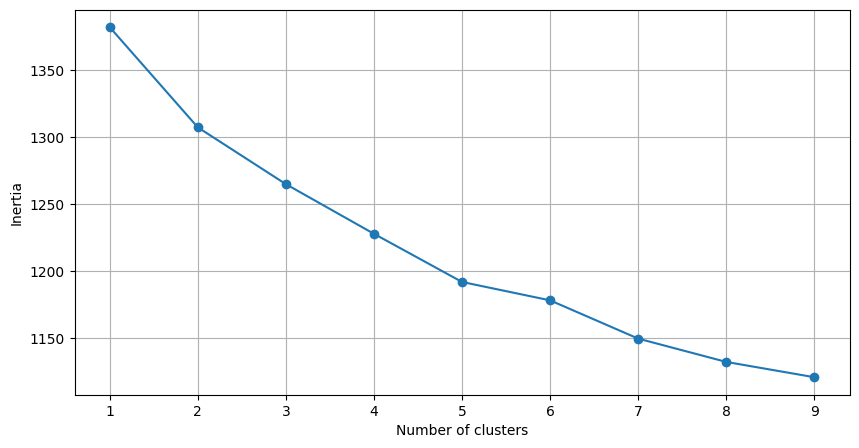

In [95]:
optimise_k_means(df_arrays_convert.iloc[:,0:300],10)

In [96]:
Kmeans = KMeans(n_clusters=5)

Kmeans.fit(df_arrays_convert.iloc[:,0:300])

C:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [97]:
df_arrays_convert["clusters"] = Kmeans.labels_
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_arrays_convert[["categoria_ingles_sep","clusters"]])

                                  categoria_ingles_sep  clusters
0                                               mobile         0
1                                        game sony psp         0
2                              portable mp3 mp4 player         0
3                                            computing         0
4                      keyboard mouse input peripheral         0
5                                             portable         0
6                                external data storage         0
7                                   steering wheel wii         0
8                                playstation 3 console         0
9                                    nintendo d system         0
10                                         electronics         0
11                                             monitor         0
13               charger charging base laptop netbooks         4
14                                   hardware game wii         0
15                       

In [116]:
df_final=df.merge(df_arrays_convert[["categoria_ingles_sep","clusters"]],how="left",on="categoria_ingles_sep")

In [118]:
df_final.loc[df_final.categoria=="fallo del sistema",["clusters"]]=5

In [120]:
df_final.to_csv("C:/Users/Alex/OneDrive/Desktop/python_proyects/swoopo_proyect/primera_categorizacion+ingles+arrays+clusters.csv")